In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dt_apriltags import Detector

In [6]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)

Exception: camera_params must be provided to detect if estimate_tag_pose is set to True

[[[2358 1005 3822 1185]]

 [[   3 1860  740 1452]]

 [[1009 2125 1469 1359]]

 [[3203 1206 3814 1325]]

 [[1419 2133 1670 1126]]

 [[2968  853 3815  809]]

 [[2540 1080 3214 1211]]

 [[   9 1793  620 1481]]

 [[1519 1740 1673 1123]]

 [[3005 1169 3816 1326]]

 [[   3 1862 1045 1284]]

 [[2493 1021 3542 1149]]

 [[  21 1846  774 1429]]

 [[   0 1860  769 1434]]]


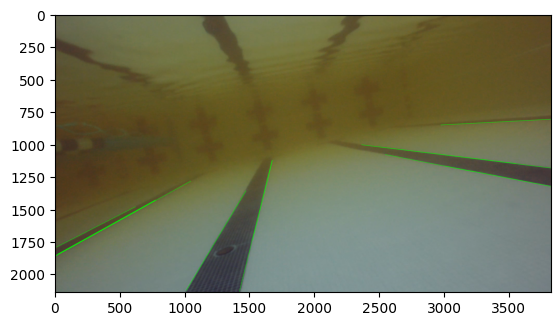

In [6]:
#img = cv2.imread('test_image.png')
img = cv2.imread('/home/aidan/cv-intro/why.jpg', 1)
#cv2.imshow('please', img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 200, 300, apertureSize=5) # detect edges
plt.imshow(edges)
lines = cv2.HoughLinesP(
                edges,
                10,
                np.pi/180,
                100,
                minLineLength=600,
                maxLineGap=50,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
print(lines)
plt.imshow(img)

In [12]:
img = cv2.imread('pool_test.png')
lines = detect_lines(img)
print(lines)

None
[]
